<a href="https://colab.research.google.com/github/shash365/iitkgp-aiml/blob/main/DL_appn_inCompVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim

In [2]:
class AlexNet(nn.Module):
    def __init__(self, num=10):
        super(AlexNet, self).__init__()
        self.feature = nn.Sequential(
		    # Define feature extractor here...
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=96, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=1)
        )
        self.classifier = nn.Sequential(
		    # Define classifier here...
            nn.Dropout(),
            nn.Linear(in_features=4608, out_features=2048),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(in_features=2048, out_features=1024),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=1024, out_features=num)
        )

    def forward(self, x):
	    # define forward network 'x' that combines feature extractor and classifier
        x = self.feature(x)
        x = x.view(-1, 32 * 12 * 12)
        x = self.classifier(x)
        return x

In [3]:
def load_subset(full_train_set, full_test_set, label_one, label_two):
    # Sample the correct train labels
    train_set = []
    data_lim = 20000
    for data in full_train_set:
        if data_lim>0:
            data_lim-=1
            if data[1]==label_one or data[1]==label_two:
                train_set.append(data)
        else:
            break

    test_set = []
    data_lim = 1000
    for data in full_test_set:
        if data_lim>0:
            data_lim-=1
            if data[1]==label_one or data[1]==label_two:
                test_set.append(data)
        else:
            break

    return train_set, test_set


In [4]:
def train(model,optimizer,train_loader,epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

In [5]:
def test(model,test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        with torch.no_grad():
            data, target = Variable(data), Variable(target)
        output = model(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item()#size_average=False
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

    test_loss /= len(test_loader.dataset)
    acc=100. * float(correct.to(torch.device('cpu')).numpy())
    test_accuracy = (acc / len(test_loader.dataset))
    return test_accuracy

In [11]:
if __name__ == '__main__':

#    if len(sys.argv) == 3:
#        print("Usage: python assignment.py <number> <number>")
#        sys.exit(1)

    input_data_one =  8                #sys.argv[1].strip()
    input_data_two =  7                #sys.argv[2].strip()
    epochs = 5                         #sys.argv[3].strip()

    """  Call to function that will perform the computation. """
#    if input_data_one.isdigit() and input_data_two.isdigit() and epochs.isdigit():

    label_one = int(input_data_one)
    label_two = int(input_data_two)
    epochs = int(epochs)

    if label_one!=label_two and 0<=label_one<=9 and 0<=label_two<=9:
        torch.manual_seed(42)
        # Load MNIST dataset
        trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
        full_train_set = dset.MNIST(root='./data', train=True, transform=trans, download=True)
        full_test_set = dset.MNIST(root='./data', train=False, transform=trans)
        batch_size = 16
        # Get final train and test sets
        train_set, test_set = load_subset(full_train_set,full_test_set,label_one,label_two)

        train_loader = torch.utils.data.DataLoader(dataset=train_set,batch_size=batch_size,shuffle=False)
        test_loader = torch.utils.data.DataLoader(dataset=test_set,batch_size=batch_size,shuffle=False)

        model = AlexNet()
        if torch.cuda.is_available():
            model.cuda()

        optimizer = optim.SGD(model.parameters(), lr=0.01)

        for epoch in range(1, epochs+1):
            train(model,optimizer,train_loader,epoch)
            accuracy = test(model,test_loader)

        print(round(accuracy,2))


    else:
       print("Invalid input")
#    else:
#        print("Invalid input")


95.21


Programming_Assignment_4_DL_Applications_in_Computer_Vision

**Objective**: This assignment has two objectives:
1. Understanding how to implement Image Classification model using PyTorch.
2. Develop a pipeline to solve the MNIST classification problem and output model accuracy.

**Problem**: Write a Python program using the provided template to train and test a partial MNIST dataset using a modified AlexNet as shown below. The program should accept three integers as command line input. First two integers define the labels of the two-class classification and third integer
represents the number of epochs for training. Output only the final model accuracy and nothing else.


**Feature Extractor**:
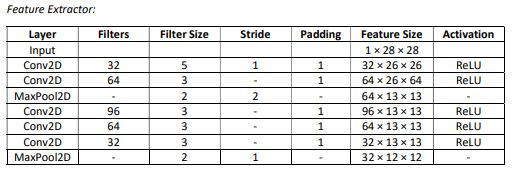


**Classifier**:
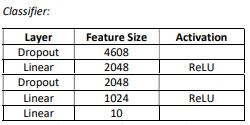


**Note**: Even if there are two classes, we output 10 features in the last Linear layer for correct mapping.

**Instructions**: Download the dataset along with template program and write your code in the designated location mentioned in the comments only. You are required only to write the sequential model for feature extractor, classifier and forward (feature extractor THEN classifier). The dataset must be in the current working directory with the structure data/MNIST/raw/*. You should read the skeleton code to understand the exact mechanism of input from the command line and provide the required output. To train and test modified AlexNet with 1 and 2 MNIST classes with 4 training epochs, the command line input should be: python assignment.py 1 2 4

**Execution Syntax**: python assignment.py <number> <number> <number>

**Sample Test Cases**:

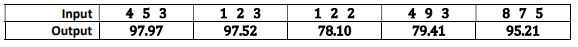